## Step 0: Setup

## Step 1: Conceptual explanation of GWL

## Step 2: Using AE to load climate data on GWLs

In [1]:
from climakitae.new_core.user_interface import ClimateData

In [2]:
cd = ClimateData()

✅ Ready to query! 


In [ ]:
# Here is an example of loading data at a specific warming level (2C) with a 10-year window.
gwl_data = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")
    .table_id("day")
    .grid_label("d03")
    .variable("tasmax")
    .processes({
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Default is 15
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        },
    })
    .get()
)

/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(


Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'day', 'grid_label': 'd03', 'variable_id': 'tasmax'}


In [32]:
# Let's take a look at the data
gwl_data.tasmax

<xarray.DataArray 'tasmax' (sim: 129, warming_level: 1, time_delta: 11315,
                            lat: 495, lon: 559)> Size: 2TB
dask.array<concatenate, shape=(129, 1, 11315, 495, 559), dtype=float32, chunksize=(1, 1, 1617, 123, 139), chunktype=numpy.ndarray>
Coordinates:
  * sim            (sim) object 1kB 'LOCA2_UCSD_GFDL-ESM4_ssp585_day_d03_r1i1...
  * warming_level  (warming_level) float64 8B 2.0
  * lat            (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon            (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0
  * time_delta     (time_delta) int64 91kB -5658 -5657 -5656 ... 5654 5655 5656
    simulation     (sim) <U50 26kB 'LOCA2.UCSD.GFDL-ESM4.ssp585.day.d03.r1i1p...
    centered_year  (sim, warming_level) int64 1kB 2051 2053 2054 ... 2057 2067
Attributes:
    long_name:  tasmax
    units:      K

Notice how we did not specify an SSP to choose here.

We will also grab other variables using a Global Warming Level approach.

In [ ]:
# Here is an example of loading data at a specific warming level (2C) with a 10-year window.
precip_data = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")
    .table_id("day")
    .grid_label("d03")
    .variable("pr")
    .processes({
        "warming_level": {
            "warming_levels": [0.8], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Default is 15
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        }
    })
    .get()
)

/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(


Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'day', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.


/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for LOCA2.UCSD.HadGEM3-GC31-LL.ssp585.day.d03.r1i1p1f3 with key LOCA2.UCSD.HadGEM3-GC31-LL.historical.day.d03.r1i1p1f3. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.
  warnings.warn(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for LOCA2.UCSD.HadGEM3-GC31-LL.ssp585.day.d03.r2i1p1f3 with key LOCA2.UCSD.HadGEM3-GC31-LL.historical.day.d03.r2i1p1f3. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.
  warnings.warn(
/Users/calvin/Desktop/cal-adapt/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for LOCA2.UCSD.HadGEM3-GC31-LL.ssp585.day.d03.r3i1p1f3 with key LOCA2.UCSD.HadGEM3-GC3

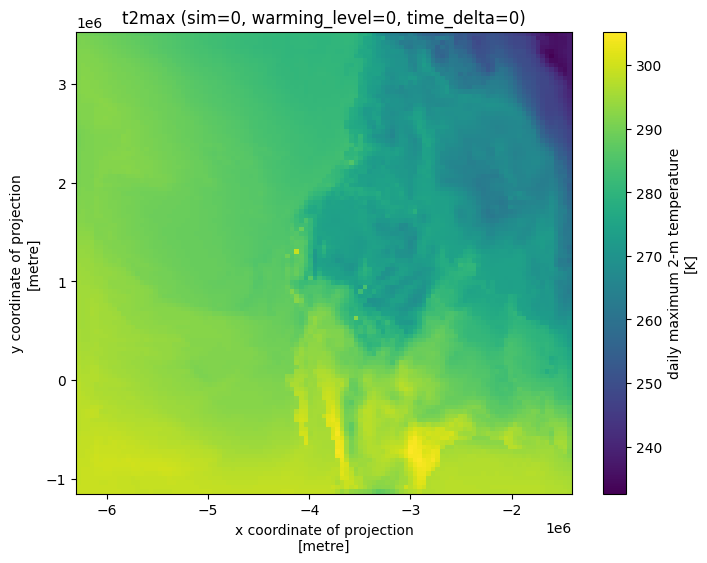

In [ ]:
import matplotlib.pyplot as plt

# Plot each variable in gwl_data
for var in t2max_gwl_data.data_vars:
    data = t2max_gwl_data[var]
    # Select the first simulation, warming_level, and time_delta for plotting
    arr = data.isel(sim=0, warming_level=0, time_delta=0)
    plt.figure(figsize=(8, 6))
    arr.plot()
    plt.title(f"{var} (sim=0, warming_level=0, time_delta=0)")
    plt.show()

In [33]:
# Now, we're going to clip the data to a gridcell of interest
lat = 34.2808
lon = -119.2931

gwl_data_onecell = gwl_data.sel(lat=lat, lon=lon, method='nearest')

## Step 3: Using AE to load climate data for target-year planning

In [48]:
from climakitae.util.warming_levels import get_year_at_gwl

Let's select a scenario and target year that is equivalent to one of our GWLs for a comparison.

Below is a demonstration of a function we have in `climakitae` that can help identify the years corresponding to a given GWL.

In [51]:
get_year_at_gwl(2.0, 'all')

,5%,Mean,95%
Historical,NaN,NaN,NaN
SSP 1-1.9,NaN,NaN,NaN
SSP 1-2.6,NaN,NaN,NaN
SSP 2-4.5,2039.0,2053.0,2081.0
SSP 3-7.0,2037.0,2047.0,2061.0
SSP 5-8.5,2034.0,2042.0,2054.0


Let's use SSP 3-7.0 for comparison, and take a 30-year time slice of data around the year **2047** (based on the table above).

In [20]:
# Let's select a scenario and target year that is equivalent to one of our GWLs for a comparison.
time_data = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")
    .table_id("day")
    .grid_label("d03")
    .variable("tasmax")
    .processes({
        "time_slice": ('2033-01-01', '2062-01-01'),
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'day', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


In [21]:
# Let's clip this to the gridcell of interest
time_data_onecell = time_data.sel(lat=lat, lon=lon, method='nearest')

## Step 4: Do some analysis on the data we loaded

We will conduct a comparison of the two datasets by analyzing future climate projections against historical baselines. Specifically, we will calculate the difference in **average maximum air temperature between a 2.0°C and 0.8°C warming world**, and evaluate how these changes align with their time-based components.

In [57]:
# Let's calculate this metric on the GWL dataset
gwl_data_onecell

<xarray.Dataset> Size: 6MB
Dimensions:        (sim: 129, warming_level: 1, time_delta: 11315)
Coordinates:
  * sim            (sim) object 1kB 'LOCA2_UCSD_GFDL-ESM4_ssp585_day_d03_r1i1...
  * warming_level  (warming_level) float64 8B 2.0
    lat            float32 4B 34.27
    lon            float32 4B -119.3
  * time_delta     (time_delta) int64 91kB -5658 -5657 -5656 ... 5654 5655 5656
    simulation     (sim) <U50 26kB 'LOCA2.UCSD.GFDL-ESM4.ssp585.day.d03.r1i1p...
    centered_year  (sim, warming_level) int64 1kB 2051 2053 2054 ... 2057 2067
Data variables:
    tasmax         (sim, warming_level, time_delta) float32 6MB dask.array<chunksize=(1, 1, 1617), meta=np.ndarray>
Attributes: (12/103)
    Conventions:                         CF-1.7 CMIP-6.0 UGRID-1.0
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    activity_id:                         CMIP
    bias_correction:                     downscaling via PresRat, Pierce et a...
    ...                                  ...
    resolution:                          3 km
    warming_level:                       {'warming_levels': [2.0], 'warming_l...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...
    update_attributes:                   Process 'update_attributes' applied ...
    warming_level_simple:                Process 'warming_level_simple' appli...

In [ ]:
# Let's comapre the average change of 

## Step 5: Illustrating differences between GWL and target-year planning